<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/PyTorch/PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch Workflow

In [2]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Simple Linear Regression

In [7]:
# Y = a+bX
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)

In [9]:
y = bias+weight*X

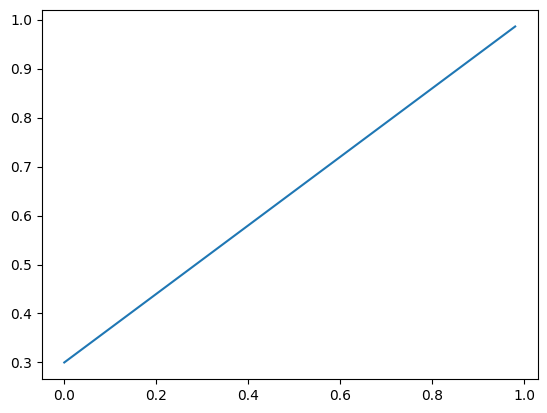

In [11]:
plt.plot(X,y)

In [13]:
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]

In [14]:
X_test,y_test = X[train_split:],y[train_split:]

In [20]:
def plot_predictions(train_data,train_labels,test_data,test_labels,predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c='b',s=4,label="Training Data")
  plt.scatter(test_data,test_labels,c='g',s=4,label="Testing Data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c = 'r',s=4,label = 'Predicted Data')
  plt.legend(prop={'size':14})

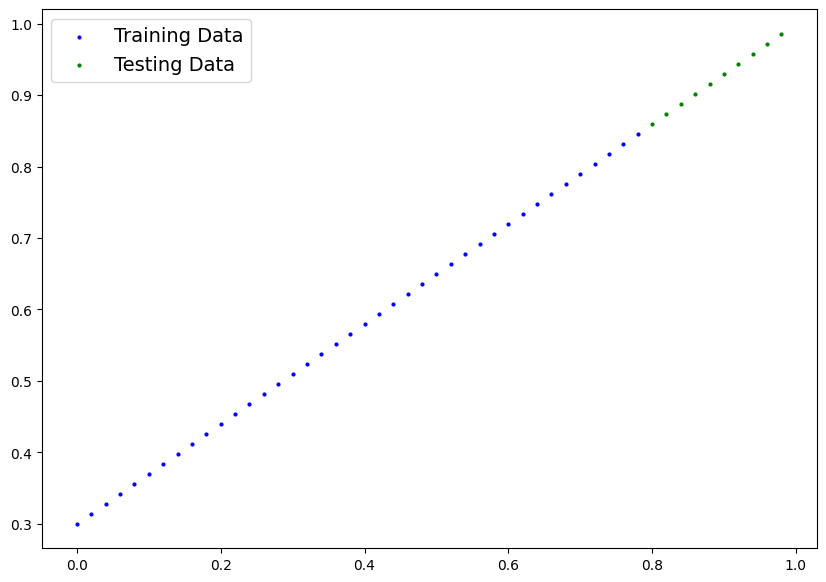

In [21]:
plot_predictions(X_train,y_train,X_test,y_test)

### Building Model

In [26]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad = True,dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad = True,dtype=torch.float))

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weights*x+self.bias


In [29]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()

In [30]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [41]:
with torch.inference_mode():
  y_preds = model_0(X_test).squeeze(dim=1)

In [42]:
y_preds

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])

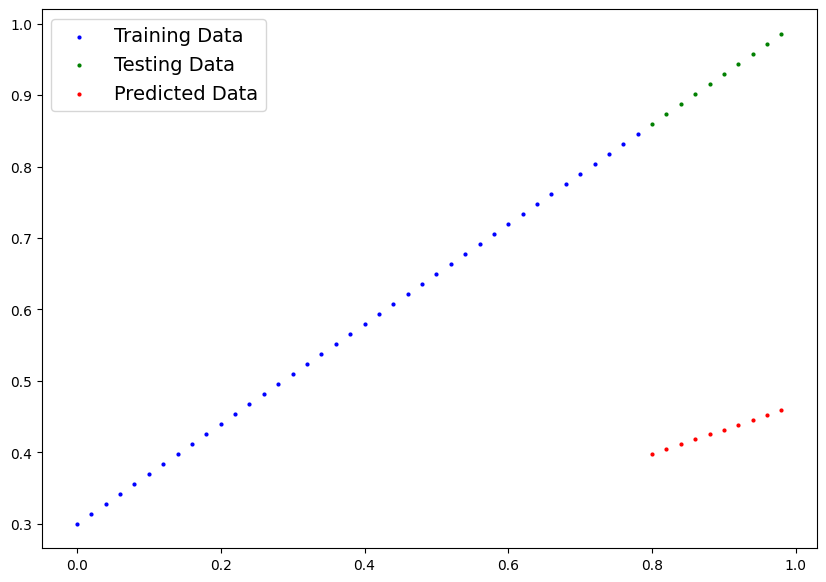

In [43]:
plot_predictions(X_train,y_train,X_test,y_test,y_preds)

### Setting up loss_fn and optimizer

In [50]:
lr = 0.001
# Setup Loss Function
loss_fn = nn.L1Loss()
# Setup Optimizer
optimizer = torch.optim.SGD(model_0.parameters(),lr = lr)

### Setting up Training Loop

In [51]:
epochs = 1

for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_train,y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [52]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3371], requires_grad=True),
 Parameter containing:
 tensor([0.1298], requires_grad=True)]